In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



In [91]:
# Load the data
file_path = 'RR_data.csv'
data = pd.read_csv(file_path)

# Ensure Date column is parsed correctly
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data = data.dropna(subset=['Date'])

# Drop unnecessary columns
data = data.drop(columns=['Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33'])



In [92]:
# Selecting features and target variable
selected_columns = [
    'Consumer Price Index', 
    'Industrial Production: Total Index', 
    'Unemployment Rate', 
    'Employment Level', 
    'All Employees, Total Nonfarm', 
    'Labor Force Participation Rate', 
    'Personal Consumption Expenditures', 
    'Real Disposable Personal Income', 
    'Spot Crude Oil Price: West Texas Intermediate (WTI)', 
    'Motor Vehicle Retail Sales: Domestic Autos'
]
features = data[selected_columns]
target = data['SP500 RoR']

# Ensure there are no NaN values in the selected columns
features = features.dropna()
target = target.dropna()

# Confirm the shape of the dataset
print(f"Features shape: {features.shape}")
print(f"Target shape: {target.shape}")



Features shape: (612, 10)
Target shape: (612,)


In [93]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)



In [94]:
# Check the sizes of the datasets
train_size = len(X_train)
test_size = len(X_test)

print(f"Total dataset size: {len(data)}")
print(f"Training dataset size: {train_size}")
print(f"Testing dataset size: {test_size}")

Total dataset size: 612
Training dataset size: 489
Testing dataset size: 123


In [95]:
# Baseline Regression Model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)
baseline_predictions = baseline_model.predict(X_test)



In [96]:
# Machine Learning Regression Model (Random Forest)
ml_model = RandomForestRegressor(random_state=42)
ml_model.fit(X_train, y_train)
ml_predictions = ml_model.predict(X_test)

# Plotting the results
plt.figure(figsize=(20, 10))  # Adjust the figure size to match the style



<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

Text(0.5, 1.0, 'Baseline Regression Model')

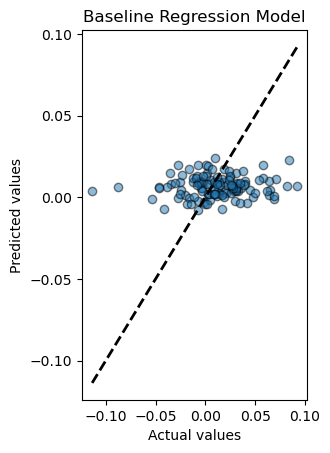

In [97]:
# Baseline Regression Model
plt.subplot(1, 2, 1)
plt.scatter(y_test, baseline_predictions, alpha=0.5, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Baseline Regression Model')





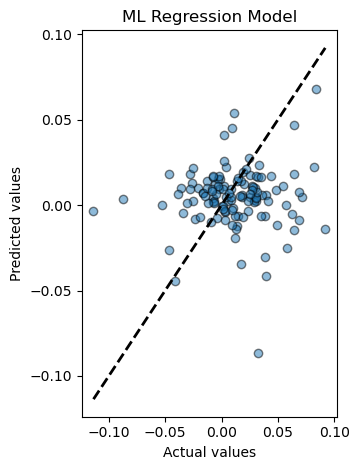

In [98]:
# ML Regression Model
plt.subplot(1, 2, 2)
plt.scatter(y_test, ml_predictions, alpha=0.5, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('ML Regression Model')

plt.tight_layout()
plt.show()


In [99]:
# Calculating and printing the Mean Squared Error
baseline_mse = mean_squared_error(y_test, baseline_predictions)
ml_mse = mean_squared_error(y_test, ml_predictions)

print(f"Baseline Model Mean Squared Error: {baseline_mse}")
print(f"ML Model Mean Squared Error: {ml_mse}")

Baseline Model Mean Squared Error: 0.0010681858505973585
ML Model Mean Squared Error: 0.0013376662090288593


In [100]:

# Selecting features and target variable
selected_columns = [
    'Consumer Price Index', 
    'Industrial Production: Total Index', 
    'Unemployment Rate', 
    'Employment Level', 
    'All Employees, Total Nonfarm', 
    'Labor Force Participation Rate', 
    'Personal Consumption Expenditures', 
    'Real Disposable Personal Income', 
    'Spot Crude Oil Price: West Texas Intermediate (WTI)', 
    'Motor Vehicle Retail Sales: Domestic Autos'
]
features = data[selected_columns]
target = data['SP500 RoR']

# Ensure there are no NaN values in the selected columns
features = features.dropna()
target = target.dropna()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R² and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Create the ML Regression Model Characteristics DataFrame
ml_regression_data = {
    "Name of characteristics": [
        "Model name", 
        "Model type", 
        "Train - test split*", 
        "Datapoints in train dataset", 
        "Datapoints in test dataset", 
        "R²", 
        "MSE"
    ],
    "Characteristics": [
        "ML Regression model",
        "OLS Linear regression",
        "20 %*",
        str(len(X_train)),
        str(len(X_test)),
        f"{r2:.2%}",
        f"{mse:.4f}"
    ]
}

ml_regression_df = pd.DataFrame(ml_regression_data)

print("ML Regression Model Characteristics")
print(ml_regression_df)


ML Regression Model Characteristics
       Name of characteristics        Characteristics
0                   Model name    ML Regression model
1                   Model type  OLS Linear regression
2          Train - test split*                  20 %*
3  Datapoints in train dataset                    489
4   Datapoints in test dataset                    123
5                           R²                 -2.87%
6                          MSE                 0.0011


In [101]:
# Selecting features and target variable
selected_columns = [
    'Consumer Price Index', 
    'Industrial Production: Total Index', 
    'Unemployment Rate', 
    'Employment Level', 
    'All Employees, Total Nonfarm', 
    'Labor Force Participation Rate', 
    'Personal Consumption Expenditures', 
    'Real Disposable Personal Income', 
    'Spot Crude Oil Price: West Texas Intermediate (WTI)', 
    'Motor Vehicle Retail Sales: Domestic Autos'
]
features = data[selected_columns]
target = data['SP500 RoR']

# Ensure there are no NaN values in the selected columns
features = features.dropna()
target = target.dropna()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define the DL FFNN model
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=20, validation_split=0.2, verbose=0)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R² and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Create the DL FFNN Model Characteristics DataFrame
dl_ffnn_data = {
    "Name of characteristics": [
        "Model name", 
        "Model type", 
        "Train - test split", 
        "Datapoints in train dataset", 
        "Datapoints in test dataset", 
        "Number of hidden layers", 
        "Activation function", 
        "Optimizer*", 
        "Batch size*", 
        "Epoch*", 
        "R²", 
        "MSE"
    ],
    "Characteristics": [
        "DL FFNN model",
        "Sequential NN",
        "20 %",
        str(len(X_train)),
        str(len(X_test)),
        "3 (512, 256, 128 neurons)",
        "Relu",
        "Adam",
        "20",
        "100",
        f"{r2:.2%}",
        f"{mse:.4f}"
    ]
}

dl_ffnn_df = pd.DataFrame(dl_ffnn_data)

print("\nDL FFNN Model Characteristics")
print(dl_ffnn_df)

4/4 [==============================] - 0s 5ms/step

DL FFNN Model Characteristics
        Name of characteristics            Characteristics
0                    Model name              DL FFNN model
1                    Model type              Sequential NN
2            Train - test split                       20 %
3   Datapoints in train dataset                        489
4    Datapoints in test dataset                        123
5       Number of hidden layers  3 (512, 256, 128 neurons)
6           Activation function                       Relu
7                    Optimizer*                       Adam
8                   Batch size*                         20
9                        Epoch*                        100
10                           R²             -313262012.32%
11                          MSE                  3252.8487
